# Non-Coding Answers

## Part 1

We have $X(I)$ a Poisson random variable with parameter $\lambda |I|$, where $\lambda = 2$ and $|I| = \alpha.$ Thus:
$$
\mathbb{P}(X(I)=0) = e^{-2\alpha}.
$$
We want $\mathbb{P}(X(I) = 0) \leq 0.0005,$ so:
$$
e^{-2\alpha} \leq 0.0005 \implies -2\alpha \leq \ln(0.0005) \implies \alpha \geq -\frac{\ln(0.0005)}{2}.
$$
Numerically, $\ln(0.0005) \approx -7.6009$, hence:
$$
\alpha \geq \frac{7.6009}{2} = 3.80045.
$$
The smallest positive integer $\alpha$ satisfying this is $\alpha = 4.$

For $Y(A)$, we have a Poisson random variable with parameter $\lambda |A|$, where $\lambda = 2$ and $|A| = \beta^2.$ Thus:
$$
\mathbb{P}(Y(A)=0) = e^{-2\beta^2}.
$$
We want $\mathbb{P}(Y(A)=0) \leq 0.0005,$ so:
$$
e^{-2\beta^2} \leq 0.0005 \implies -2\beta^2 \leq \ln(0.0005) \implies \beta^2 \geq -\frac{\ln(0.0005)}{2}.
$$
As above, $-\frac{\ln(0.0005)}{2} = 3.80045,$ hence:
$$
\beta \geq \sqrt{3.80045} \approx 1.94947.
$$
The smallest positive integer $\beta$ is $\beta = 2.$

## Part 2

With $\alpha=4,$ we have $I = [-2, 2]$ and thus:
$$
X(I) \sim \text{Poisson}(2 \cdot 4) = \text{Poisson}(8).
$$

With $\beta=2,$ we have $A = [-1,1]^2$ and thus:
$$
Y(A) \sim \text{Poisson}(2 \cdot 2^2) = \text{Poisson}(8).
$$

## Part 5 (Distribution of the Second Closest Point)

Let $R_2^{(X)}$ denote the distance to the second closest point from the origin for the 1D process $X.$ The number of points in $[-r, r]$ is $\text{Poisson}(4r).$ The probability that there are fewer than two points within distance $r$ is:
$$
\mathbb{P}(X([-r,r])<2) = e^{-4r}(1 + 4r).
$$
Thus the CDF of $R_2^{(X)}$ is:
$$
F_{R_2^{(X)}}(r) = 1 - e^{-4r}(1 + 4r).
$$

For the 2D process $Y,$ let $R_2^{(Y)}$ be the radius of the second closest point. The number of points in the disk of radius $r$ is $\text{Poisson}(2 \pi r^2).$ Hence:
$$
\mathbb{P}(Y(B(0,r))<2) = e^{-2\pi r^2}(1 + 2\pi r^2).
$$
Thus the CDF of $R_2^{(Y)}$ is:
$$
F_{R_2^{(Y)}}(r) = 1 - e^{-2 \pi r^2}(1 + 2\pi r^2).
$$

## Part 6 (General $m$-th Closest Point)

For a 1D Poisson process with rate $\lambda,$ the count in $[-r,r]$ is $\text{Poisson}(2\lambda r).$ The probability of having fewer than $m$ points is:
$$
\sum_{k=0}^{m-1} e^{-2\lambda r}\frac{(2\lambda r)^k}{k!}.
$$
Thus the CDF for the $m$-th closest point $R_m$ is:
$$
F_{R_m}(r) = 1 - \sum_{k=0}^{m-1} e^{-2\lambda r}\frac{(2\lambda r)^k}{k!}.
$$

For a 2D Poisson process with rate $\lambda,$ the number of points in a disk of radius $r$ is $\text{Poisson}(\lambda \pi r^2).$ Thus the CDF for the $m$-th closest point is:
$$
F_{R_m}(r) = 1 - \sum_{k=0}^{m-1} e^{-\lambda \pi r^2}\frac{(\lambda \pi r^2)^k}{k!}.
$$

---

Alpha: 4.0, Beta: 2.0
Lambda_X: 8.0, Lambda_Y: 8.0


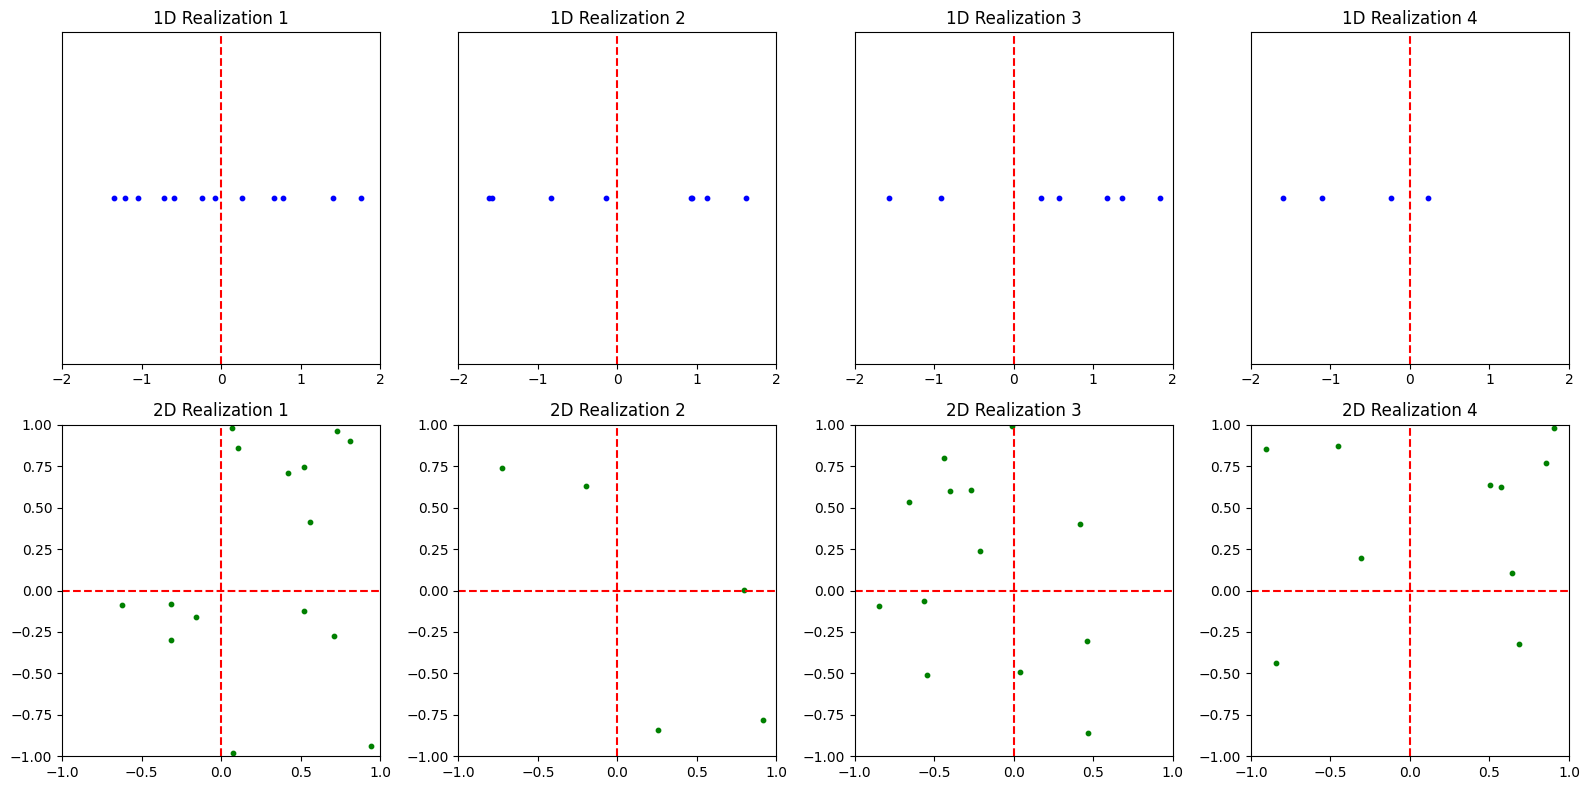

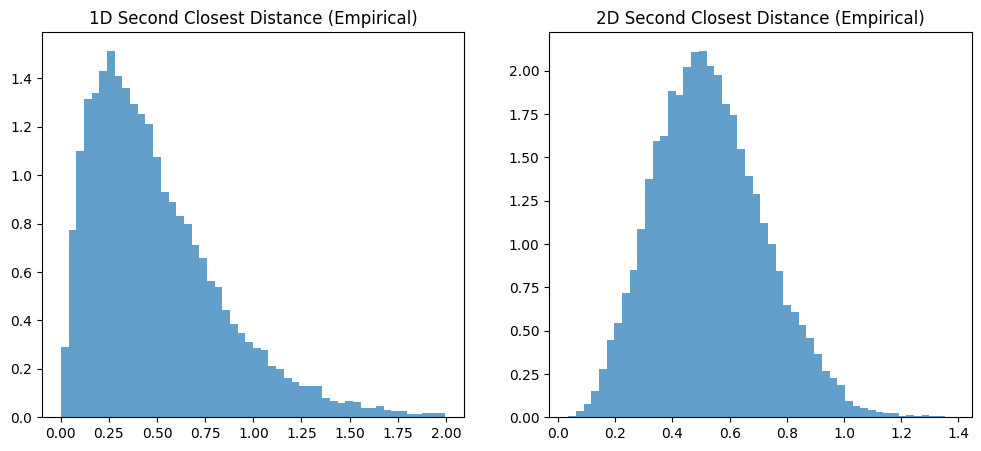

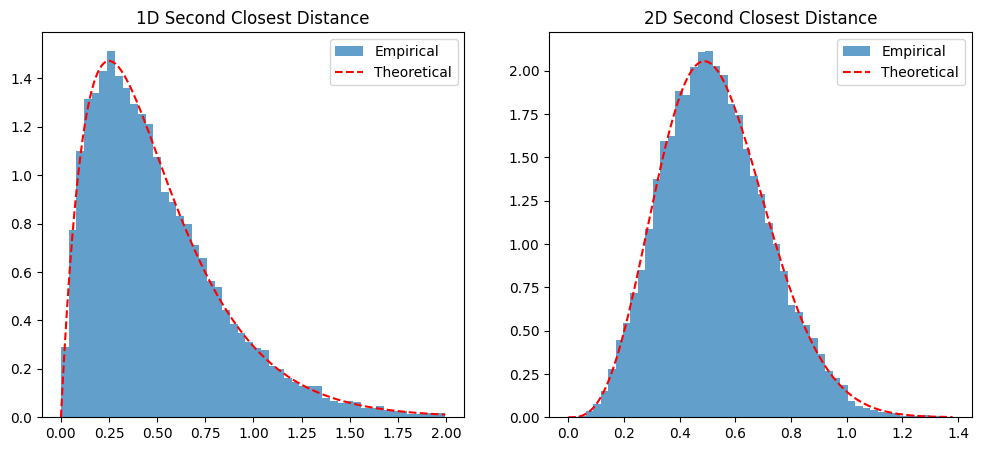

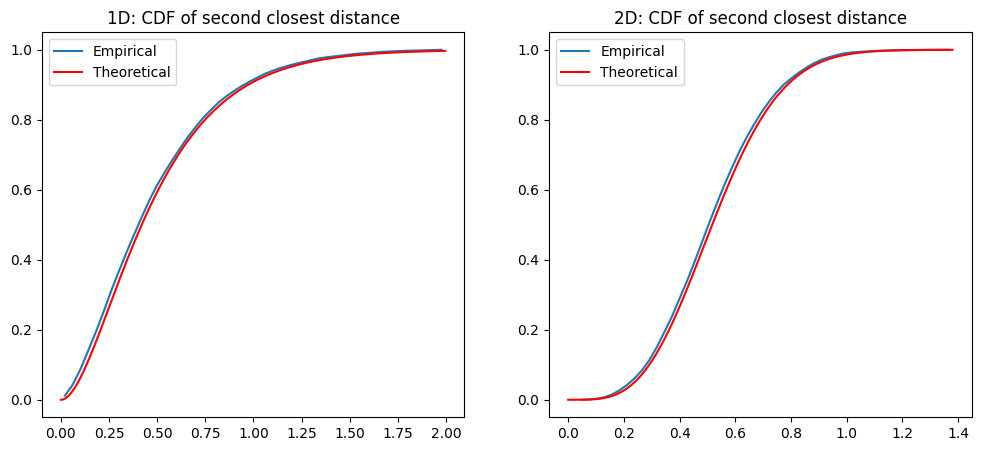

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import log, sqrt, pi, exp
from scipy.stats import poisson

# Given:
p_threshold = 0.0005

# Part 1: Solve for alpha and beta
alpha = np.ceil(-log(p_threshold)/2)  # smallest positive integer alpha
beta = np.ceil(sqrt(-log(p_threshold)/2))  # smallest positive integer beta

print(f"Alpha: {alpha}, Beta: {beta}")

# Part 2: Distributions
# X(I) ~ Poisson(2*alpha)
# Y(A) ~ Poisson(2*beta^2)

lambda_X = 2*alpha
lambda_Y = 2*(beta**2)

print(f"Lambda_X: {lambda_X}, Lambda_Y: {lambda_Y}")

# Part 3:

I = [-alpha/2, alpha/2]
A = [-beta/2, beta/2]

def simulate_poisson_1D(lmbd, interval):
    n = np.random.poisson(lmbd)
    return np.random.uniform(interval[0], interval[1], n)

def simulate_poisson_2D(lmbd, box):
    n = np.random.poisson(lmbd)
    x = np.random.uniform(box[0], box[1], n)
    y = np.random.uniform(box[0], box[1], n)
    return np.column_stack((x,y))

# Part 3: Plot 4 realizations each
fig, axs = plt.subplots(2,4, figsize=(16,8))

for i in range(4):
    x_points = simulate_poisson_1D(lambda_X, I)
    axs[0,i].scatter(x_points, np.zeros_like(x_points), c='b', s=10)
    axs[0,i].set_title(f"1D Realization {i+1}")
    axs[0,i].axvline(0, color='r', linestyle='--')
    axs[0,i].set_xlim(I[0], I[1])
    axs[0,i].set_ylim(-0.1, 0.1)
    axs[0,i].set_yticks([])

for i in range(4):
    y_points = simulate_poisson_2D(lambda_Y, A)
    axs[1,i].scatter(y_points[:,0], y_points[:,1], c='g', s=10)
    axs[1,i].set_title(f"2D Realization {i+1}")
    axs[1,i].axvline(0, color='r', linestyle='--')
    axs[1,i].axhline(0, color='r', linestyle='--')
    axs[1,i].set_xlim(A[0], A[1])
    axs[1,i].set_ylim(A[0], A[1])

plt.tight_layout()
plt.show()

# Part 4 & 5: Empirical and theoretical distributions of second closest point
def second_closest_distance_1D(lmbd, interval, n_samples=10000):
    distances = []
    for _ in range(n_samples):
        pts = simulate_poisson_1D(lmbd, interval)
        if len(pts) < 2:
            continue
        dists = np.sort(np.abs(pts))
        distances.append(dists[1])
    return np.array(distances)

def second_closest_distance_2D(lmbd, box, n_samples=10000):
    distances = []
    for _ in range(n_samples):
        pts = simulate_poisson_2D(lmbd, box)
        if len(pts) < 2:
            continue
        dists = np.sort(np.sqrt(pts[:,0]**2 + pts[:,1]**2))
        distances.append(dists[1])
    return np.array(distances)

distances_1D = second_closest_distance_1D(lambda_X, I, n_samples=20000)
distances_2D = second_closest_distance_2D(lambda_Y, A, n_samples=20000)

# Plot histograms
fig, axs = plt.subplots(1,2, figsize=(12,5))
axs[0].hist(distances_1D, bins=50, density=True, alpha=0.7)
axs[0].set_title("1D Second Closest Distance (Empirical)")

axs[1].hist(distances_2D, bins=50, density=True, alpha=0.7)
axs[1].set_title("2D Second Closest Distance (Empirical)")
plt.show()

# Theoretical CDFs:
# 1D: F(r)=1 - e^{-4r}(1+4r) -> f(r)=16r e^{-4r}
# 2D: F(r)=1 - e^{-2πr²}(1+2πr²) -> f(r)=8π²r³ e^{-2πr²}

r_vals_1D = np.linspace(0, max(distances_1D.max(),1), 200)
pdf_1D = 16*r_vals_1D*np.exp(-4*r_vals_1D)

r_vals_2D = np.linspace(0, max(distances_2D.max(),1), 200)
pdf_2D = 8*(pi**2)*(r_vals_2D**3)*np.exp(-2*pi*(r_vals_2D**2))

# Plot theoretical PDFs over histograms
fig, axs = plt.subplots(1,2, figsize=(12,5))
axs[0].hist(distances_1D, bins=50, density=True, alpha=0.7, label='Empirical')
axs[0].plot(r_vals_1D, pdf_1D, 'r--', label='Theoretical')
axs[0].set_title("1D Second Closest Distance")
axs[0].legend()

axs[1].hist(distances_2D, bins=50, density=True, alpha=0.7, label='Empirical')
axs[1].plot(r_vals_2D, pdf_2D, 'r--', label='Theoretical')
axs[1].set_title("2D Second Closest Distance")
axs[1].legend()

plt.show()

# We'll plot the PDF over histogram for better visualization

r_vals = np.linspace(0, max(distances_1D.max(),1), 200)
cdf_1D = 1 - np.exp(-4*r_vals)*(1+4*r_vals)

r_vals_2D = np.linspace(0, max(distances_2D.max(),1), 200)
# 2D:
# CDF = 1 - e^{-2pi r^2}(1 + 2 pi r^2)
cdf_2D = 1 - np.exp(-2*pi*(r_vals_2D**2))*(1+2*pi*r_vals_2D**2)

fig, axs = plt.subplots(1,2, figsize=(12,5))

# Plot Empirical CDF 1D
counts, bins = np.histogram(distances_1D, bins=50, density=True)
cdf_emp_1D = np.cumsum(counts)* (bins[1]-bins[0])
axs[0].plot((bins[:-1]+bins[1:])/2, cdf_emp_1D, label="Empirical")
axs[0].plot(r_vals, cdf_1D, 'r', label="Theoretical")
axs[0].set_title("1D: CDF of second closest distance")
axs[0].legend()

# Plot Empirical CDF 2D
counts, bins = np.histogram(distances_2D, bins=50, density=True)
cdf_emp_2D = np.cumsum(counts)* (bins[1]-bins[0])
axs[1].plot((bins[:-1]+bins[1:])/2, cdf_emp_2D, label="Empirical")
axs[1].plot(r_vals_2D, cdf_2D, 'r', label="Theoretical")
axs[1].set_title("2D: CDF of second closest distance")
axs[1].legend()

plt.show()

# Part 6: 
# General formula derived in the markdown above.
